In [ ]:
#hide cells with html: see JupyterBook
#extension cell tags

# Moon Formation in Synestias

Moons start out as gas in a synestia. Break down forces operating on gas parcels.

Suddenly, gas parcel condenses into a droplet. Moonlet is no longer tied (coupled) to gas. Loses pressure support. Begins to fall towards midplane. Droplet is moving through gas, which drags on the moonlet. Moons of any size will experience gas drag. But how significant is it? What affects how strong the gas drag is?

#### Gas Drag Equation

There is a great deal of silicate vapor (also referred to as gas) in the moon-forming region of a synestia. Any growing silicate moonlets (also referred to as condensates or liquid droplets) will orbit within the moon-forming region of a synestia and will encounter this gas. The gas will impart a drag upon the moonlets, causing them to slow down and lose angular velocity. The orbit of the moonlets will decay over time in accord with the strength of the gas drag acceleration.

In [ ]:
#INSESRT DIAGRAM HERE

Let's get a sense for the magnitude of gas drag acceleration that we're dealing with. It is assumed that the moonlets experience a simple gas drag. The equation is as follows:
$$a_{drag}=\frac{C_D\ A \ \rho_{gas} \ (u_{gas} - u_{body})^2}{2 \ m_{body}}$$

Simple gas drag acceleration a$_{drag}$ is dependent on: the gas with density $\rho_{gas}$ that drags a body of mass $m_{body}$, the cross sectional area A of the body that the gas is interacting with, the gas drag coefficient C$_D$ (what thermal regime we are in), and the relative velocity between the gas and the body being dragged u$_{gas}$-u$_{body}$. Later, we calculate the gas drag coefficient using the Adachi et al (1976) formulation, but here you can play with its value.

#### Range of gas drag magnitude

The gas drag acceleration is output in units of m/s$^2$, but for a more intuitive idea of how strong these accelerations are, see the different accelerations you may encounter on Earth displayed below the plot. They are output in terms of 'g' where 1 g = 9.8 m/s$^2$. In other words, 1 g is one unit of gravitational acceleration here on Earth. These are next to various speeds in m/s for reference to the speed of each relative velocity.

In [10]:
import numpy as np
import math
from ipywidgets import *
import matplotlib.pyplot as plt

v_rel = np.arange(0.0, 300., 1.) #relative velocity between gas and body in m/s
Moon_density = 3300. #lunar density in kg/m3; 3.3 g/cc

def pltdrag(rad_body, C_D):
    mass_body = Moon_density*(4./3.)*math.pi*(rad_body**3) #mass of body in kg; assume spherical body
    a_drag = 0.5*C_D*math.pi*(rad_body**2)*(v_rel**2)/mass_body #acceleration imparted on body due to gas drag in m/s2; assume spherical cross section
    plt.plot(v_rel, a_drag)
    plt.xlabel('velocity of the gas relative to the velocity of the moonlet (m/s)')
    plt.ylabel('gas drag acceleration (m/s$^2$)')
    plt.show()

#PLOT ACCELERATION RELATIVE TO SOMETHING ELSE (g's, roller coasters, astronauts, etc.)    
#RELATIVE SCALE IN GENERAL: how big the moonlets are (marble, golf ball, grain of sand, yoga ball, soccer field, etc.), how fast the relative and absolute velocity is
#MAYBE THIS SHOULD BE PRINTED OUTPUT?    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
%matplotlib inline
interact(pltdrag, rad_body=FloatLogSlider(value=1, base=10, min=-3, max=6, step=1, description='Size of moonlet (m)', style=style, layout=layout),
         C_D=FloatSlider(value=2, min=0, max=2.5, step=0.5, description='Gas drag coefficient C$_D$ (-)', continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout))

#acceleration in terms of what we experience on Earth
accel_label=['on board space shuttle ISS','elevator headed up','gravitational pull on surface of Earth','roller coaster launch','space shuttle launch, gravitron amusement ride','top of roller coaster loop','maximum heavy braking on Formula One Car','maximum acceleration permitted on piloted planes','hard slap to the face, car crash','shock capacity of mechanical wrist watch','Mantis Shrimp claw strike','proton in Large Hadron Collider']
accel_g=['1e-6 g','0.2 g','1 g','1.5 g','3 g','5 g','6.3 g','10 g','100 g','5000 g','10400 g','190000000 g']
left_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_label])
right_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_g])

#velocity in terms of what we experience on Earth
vel_label=['Walking','Biking','Usain Bolt sprinting','Train','Car moving 100 mph (160 km/h)','Helicopter','Commerical airplane','Speed of sound in air (sound barrier)']
vel_ms=['1.5 m/s','4.5 m/s','12.5 m/s','27 m/s','45 m/s','70 m/s','220 m/s','343 m/s']
left_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_label])
right_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_ms])

widgets.HBox([left_box0,right_box0,left_box1,right_box1])

interactive(children=(FloatLogSlider(value=1.0, description='Size of moonlet (m)', layout=Layout(width='400px'…

As expected, for the same gas field, gas drag acceleration is greater when the mass of the moonlet is smaller and the gas drag coefficient and relative velocity are larger.

Now, let's see how a single moonlet travels through the vapor in a synestia. But first, let's see how gas travels in a synestia, so that we have a baseline to compare to.

First, we will look at how a moonlet moves on a stable Keplerian orbit. Next, we will see the effects of the second-order term of gravity on the orbit of the moonlet. We will see how gas parcels orbit in a synestia. Then, we will see how losing pressure support and being dragged by surrounding gas affects a moonlet's survival within a synestia. Moonlets have to survive long enough to grow to a mass that is not heavily affected by gas drag.

Moonlets, once formed, will quickly equilibrate to the midplane. So, we will look at orbits in the midplane first. Moonlets condense as droplets at the photosphere (where the vapor is saturated and has a pressure that lies on the vapor dome). We will check orbits of moonlets condensing at the photosphere (starting off the midplane) next. Let's check the decay time for various sizes of moonlets and various starting semi-major axes.

### Keplerian Orbits: orbits balanced by first order gravity only

The following equation describes the motion of a body in orbit around a central body where gravity is the only force involved. This equation will hold true for any orbiting mass subject only to first-order gravitational forces. A Keplerian orbit is dependent on the mass of the central body (the body being orbited e.g. the corotating region of a synestia) and how much distance there is between the orbiting body and the orbited body.

A circular orbit is a Keplerian orbit with zero eccentricity. This means the path traced by the orbiting body is a circle. If the eccentricity of a Keplerian orbit is greater than zero, the orbital path becomes an ellipse and no longer follows a circular orbit.

Below is what a circular Keplerian orbit should look like for a moonlet orbiting within the dimensions of a typical Moon-forming synestia.

Regular Keplerian Orbit equation:
$$

In [1]:
import rebound

In [9]:
#CALCULATE KEPLERIAN ORBIT WITH NORMAL GRAVITY
import numpy as np
import math
from ipywidgets import *
import matplotlib.pyplot as plt
from syndef import synfits
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint,solve_ivp
import math

G=6.674e-11 #SI
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #kg #Earth mass
mu = G*Mass_syn

def da_Kep(t,u):
    u0 = u[3]
    u1 = u[4]
    u2 = u[5]
    r = np.sqrt(u[0]**2 + u[1]**2 + u[2]**2)
    u3 = -(mu/(r**3))*u[0]
    u4 = -(mu/(r**3))*u[1]
    u5 = -(mu/(r**3))*u[2]  
    return [u0,u1,u2,u3,u4,u5]

def plt_Kep(x,y,z,n):
    #n counter-clockwise orbits
    #default starts at (x,y,z)
    #with initial velocity (v_x,v_y,v_z)
    r = (x**2 + y**2 + z**2)**0.5 #distance from origin of central body (m)
    s = (x**2 + y**2)**0.5 #distance from rotational axis (m)
    P = ((r**3)*4.*math.pi*math.pi/mu)**0.5 #orbital period (s)
    tf = P*n #cumulative time of orbit (s)
    vel = np.sqrt(mu/r) #total velocity (m/s)
    vx = -vel*y/s #x vel. (m/s)
    vy = vel*x/s #y vel. (m/s)
    vz = np.sqrt(vel**2 - vx**2 - vy**2) #z vel. (m/s)
    soln = solve_ivp(da_Kep,[0.,tf],[x,y,z,vx,vy,vz])
    rarr = np.sqrt(soln.y[0]**2 + soln.y[1]**2 + soln.y[2]**2)
    varr = np.sqrt(soln.y[3]**2 + soln.y[4]**2 + soln.y[5]**2)

    fig = plt.figure(figsize=(8,3))
    plot1 = fig.add_subplot(121, projection='3d')
    plot1.plot(soln.y[0]/1e6,soln.y[1]/1e6,soln.y[2]/1e6,color='b')
    plot1.set_xlabel('x (Mm)')
    plot1.set_ylabel('y (Mm)')
    plot1.set_zlabel('z (Mm)')
    plot2 = fig.add_subplot(122)
    plot2.plot(soln.t/3600,rarr/1e6,color='b')
    plot2.set_xlabel('time (hr)')
    plot2.set_ylabel('radius (Mm)')
    plt.tight_layout(w_pad=4)
    plt.show()
    plt.close()

style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(plt_Kep,
         x=FloatSlider(value=20e6, max=60e6, step=10e6, description='Starting x distance from central body (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         y=FloatSlider(value=0, max=60e6, step=10e6, description='Starting y distance from central body (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         z=FloatSlider(value=0, max=60e6, step=10e6, description='Starting z distance from the midplane (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         n=IntSlider(value=1, min=1, max=100, step=1, description='Number of orbits',
                        continuous_update=False, readout=True, readout_format='d', style=style, layout=layout)
        )

interactive(children=(FloatSlider(value=20000000.0, continuous_update=False, description='Starting x distance …

<function __main__.plt_Kep(x, y, z, n)>

In [7]:

def pltKep(x,y,z,n):
    #n counter-clockwise orbits
    #default starts at (x,y,z)
    #with initial velocity (v_x,v_y,v_z)
    t=0. #initial time in seconds
    radius = (x**2 + y**2 + z**2)**0.5 #distance from origin of central body (m)
    P=((radius**3)*4.*math.pi*math.pi/(G*Mass_syn))**0.5 #orbital period (s)
    dt=P/1000. #intial time step (s)
    time=P*n #cumulative time of orbit (s)
    vel=np.sqrt(G*Mass_syn/radius) #total velocity (m/s)
    v_i=np.asarray([[-vel*y/radius],[vel*x/radius],[0.]]) #x,y,z vel. (m/s) as col. vector
    v_transform=
    v_f=
    xarr=[]
    yarr=[]
    zarr=[]
    tarr=[]
    xarr.append(x)
    yarr.append(y)
    zarr.append(z)
    tarr.append(t)
    while (t < time):
        radius = (x**2 + y**2 + z**2)**0.5 #distance from origin of central body (m)
        accel_grav=-G*Mass_syn/(radius**3) #total acceleration (m/s^2)
        ax=accel_grav*x #x accel. (m/s^2)
        ay=accel_grav*y #y accel. (m/s^2)
        az=accel_grav*z #z accel. (m/s^2)
        vx+=ax*0.5*dt
        vy+=ay*0.5*dt
        vz+=az*0.5*dt
        radius = (x**2 + y**2 + z**2)**0.5 #distance from origin of central body (m)
        accel_grav=-G*Mass_syn/(radius**3) #total acceleration (m/s^2)
        ax=accel_grav*x #x accel. (m/s^2)
        ay=accel_grav*y #y accel. (m/s^2)
        az=accel_grav*z #z accel. (m/s^2)
        vx+=ax*0.5*dt
        vy+=ay*0.5*dt
        vz+=az*0.5*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        t+=dt #scale with velocity to get rid of precession #ask Phil for his
        #dt=0.001*vel*P/(vx**2 + vy**2 + vz**2)**0.5
        #if dt > dt_max:
        #    print(dt)
        #    raise KeyboardInterrupt('Error: Time step too large.')
        xarr.append(x)
        yarr.append(y)
        zarr.append(z)
        tarr.append(t)
    xarr=np.asarray(xarr)
    yarr=np.asarray(yarr)
    zarr=np.asarray(zarr)
    radiusarr=np.sqrt(xarr**2 + yarr**2 + zarr**2)
    tarr=np.asarray(tarr)
    fig=plt.figure(figsize=(9,3))
    plot1 = fig.add_subplot(121, projection='3d')
    plot1.plot(xarr,yarr,zarr,color='b')
    plot1.set_xlabel('x (m)')
    plot1.set_ylabel('y (m)')
    plot1.set_zlabel('z (m)')
    plot2 = fig.add_subplot(122)
    plot2.plot(tarr/3600,radiusarr,color='b')
    plot2.set_xlabel('time (hr)')
    plot2.set_ylabel('radius (m)')
    plt.show()
    
interact(pltKep,
         x=FloatSlider(value=20e6, max=60e6, step=10e6, description='Starting x distance from central body (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         y=FloatSlider(value=0, max=60e6, step=10e6, description='Starting y distance from central body (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         z=FloatSlider(value=0, max=60e6, step=10e6, description='Starting z distance from the midplane (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         n=IntSlider(value=1, min=1, max=100, step=1, description='Number of orbits',
                        continuous_update=False, readout=True, readout_format='d', style=style, layout=layout)
        )

interactive(children=(FloatSlider(value=20000000.0, continuous_update=False, description='Starting x distance …

<function __main__.pltKep(x, y, z, n)>

In [ ]:
#IMPORT GADGET-2 SNAPSHOT (VAPOR IN SYNESTIA)
#FIT THERMAL PARAMETER PROFILES: PRESSURE, TEMPERATURE, DENSITY
#FIT IN-PLANE VELOCITY PROFILE
#CALCULATE ORBITAL DECAY; UPDATE ACCELERATION DUE TO DRAG
widgets.Dropdown(
    options=[('Coarse sand (mm)', 1.e-3),
             ('Diameter of a belly button (cm)', 1.e-2),
             ('Coconut (dm)', 0.1),
             ('Cow (m)', 1.),
             ('230 story building (km)', 1.e3),
             ('Width of the United States (Mm)', 1.e6),
             ('The Moon (3.5 Mm)', 3.5e6)],
    value=1,
    description='Size (diameter) of moonlet:',
    style=style
)

### Oblateness of gravity field is non-negligible

In [ ]:
#see how vertical orbit is affected by J2

### Pressure term is significant

In [ ]:
# magnitude of pressure, particle doesn't have to orbit as quickly to maintain a stable orbit

### Sub-Keplerian Orbits: orbits balanced by gravity and pressure

In [ ]:
#EQUATION FOR A GAS PARCEL

### Decaying Orbits: moonlets dragged by gas in a synestia

In [ ]:
#CHANGE EQUATION TO ACCOMODATE GAS DRAG (No longer pressure supported)
#EQUATION IS FOR CONDENSATE

#### Adachi timescale estimates?

In [ ]:
#Comparison to how quickly lunar seed can grow

In [ ]:
#Expand to larger overall picture of what is going on during moon formation/growth.
#Torrential rain (thermal buffer, collisions)
#Convection?
#Most material beyond Moon would probably collect onto lunar seed
#Invoke torques to keep lunar seed alive?

### Chemistry? Pressure and temperature path of moonlets - calculations?

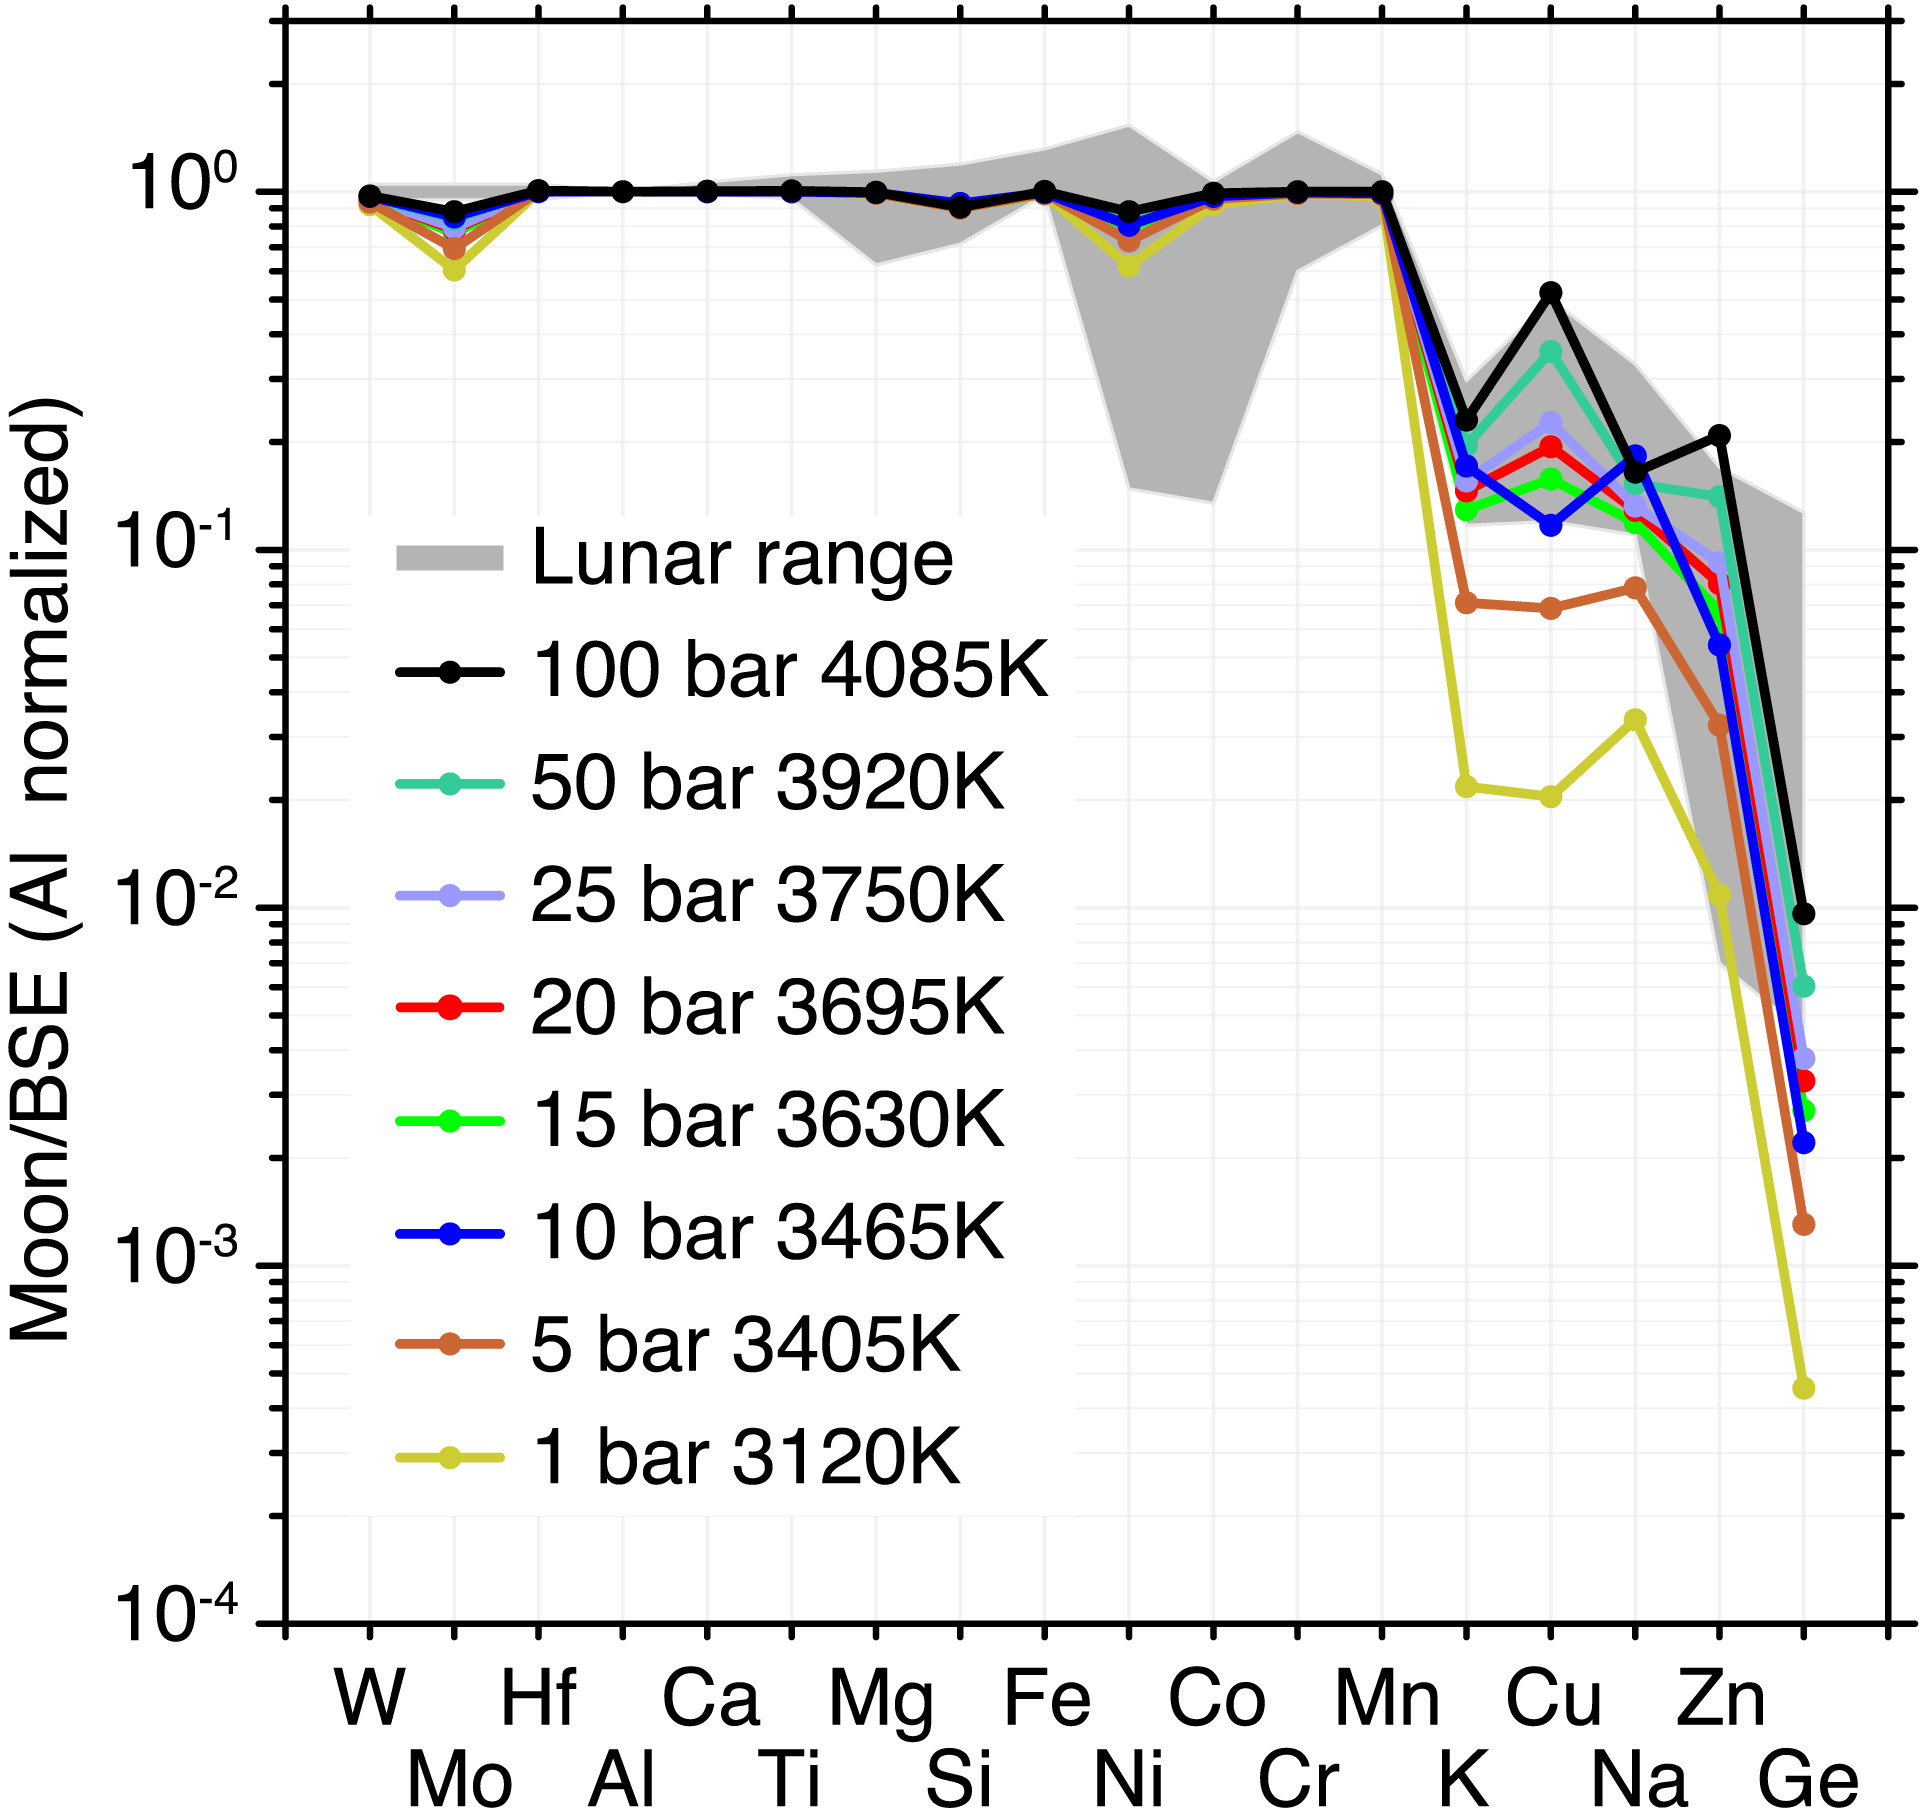

In [ ]:
#Link to index -> manual short way of navigating around
#multiple short pages
#anchor index
#table of contents in different places
#may open new pages -- annoying; book helps but doesn't have interactivity
#be able to go on to next section
#html versions of everything: don't have to have python to open jupyter notebook
#shows what you want to show, export, download as html

# References

In [ ]:
#if needed